## Normal distirbution
1. Shapew bell curved
2. Its probabilty nvere reached 0.
3. Describe by mean and standard deviation.
4. If mean=0 and sd=1 then its called standard normal deviation.
5. 68% falls within 1 standard deviation.
6. 95% falls within 2 standard deviation.
7. 99.7% falls within 3 dtandard deviation.
8. This is called 68-95-99.7 rule.


In [2]:
import pandas as pd

In [3]:
amir_deals = pd.read_csv('Data/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


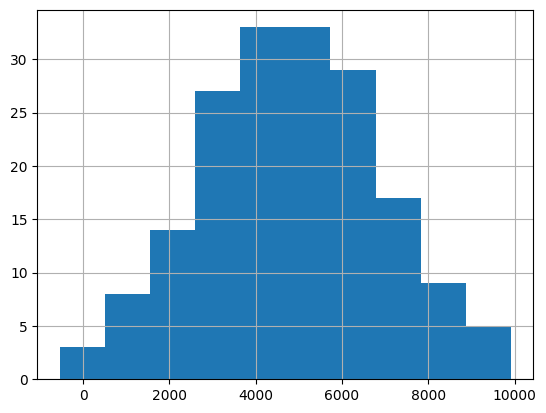

In [7]:
import matplotlib.pyplot as plt
amir_deals['amount'].hist(bins=10)
plt.show()

In [8]:
from scipy.stats import norm

In [11]:
import numpy as np
mean,std = amir_deals['amount'].agg([np.mean,np.std])

4812.000337078652

In [14]:
## probabilty of amir clossing a deal worth less than 7500
norm.cdf(7500,int(mean),int(std))

0.9042445400460171

In [16]:
## Probabilty of amir closing a deal worth more the 1000.
1 - norm.cdf(1000,mean,std)

0.9679962803797578

In [17]:
## probabilty of amir closing deal betweeen 3000 and 7500
norm.cdf(7500,mean,std) - norm.cdf(3000,mean,std)

0.7149024717473877

In [18]:
## calculate amount that 25% of deals will be less than
norm.ppf(0.25,mean,std)

3423.7835924483165

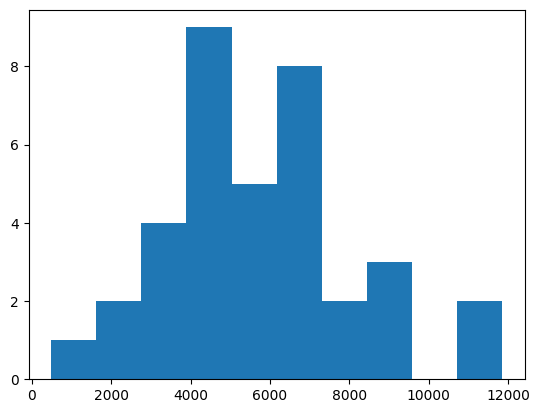

In [19]:
## new avergae sale amount if it increased by 20%
new_mean = mean * 1.2

## new statndard deviation if it increased by 20%
new_std = std * 1.3

## simulate 36 new sales
new_sales = norm.rvs(new_mean,new_std,size=36)

plt.hist(new_sales)
plt.show()

## Central limit theorm
1. The sampling distirbutions of a statistics become closer to the normal distribution as the number of trial increases.
2. Samples should be random and independent.

In [21]:
die = pd.Series([1,2,3,4,5,6])
samp_5 = die.sample(5,replace=True)
samp_5

4    5
2    3
2    3
4    5
1    2
dtype: int64

In [22]:
np.mean(samp_5)

3.6

In [27]:
sample_means = []
for i in range(1000):
    samp_5 = die.sample(5,replace=5)
    sample_means.append(np.mean(samp_5))

# sample_means

(array([ 19.,  38.,  83., 163., 197., 281., 130.,  64.,  16.,   9.]),
 array([1.4 , 1.84, 2.28, 2.72, 3.16, 3.6 , 4.04, 4.48, 4.92, 5.36, 5.8 ]),
 <BarContainer object of 10 artists>)

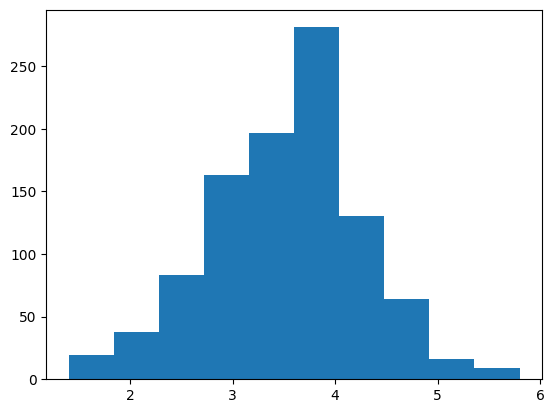

In [28]:
plt.hist(sample_means)

In [30]:
### Propotion and clt
sales_team = pd.Series(['Amir','Brian','Clarie','Damian'])
sales_team.sample(10,replace=True)

1     Brian
1     Brian
2    Clarie
1     Brian
0      Amir
0      Amir
2    Clarie
0      Amir
1     Brian
3    Damian
dtype: object

In [31]:
np.mean(sample_means)

3.5006

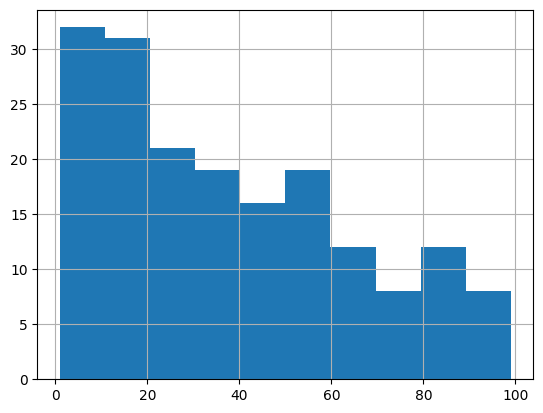

In [33]:
amir_deals['num_users'].hist()
plt.show()

In [34]:
np.random.seed(42)

sam_20 = amir_deals['num_users'].sample(20,replace=True)

np.mean(sam_20)

35.35

In [36]:
sample_means =[]
for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20,replace=True)
    sample_means.append(np.mean(samp_20))
sample_means

[47.4,
 37.0,
 47.55,
 47.6,
 32.7,
 37.1,
 29.2,
 47.95,
 40.95,
 39.2,
 41.2,
 41.35,
 31.45,
 34.1,
 37.35,
 33.2,
 27.95,
 30.25,
 32.85,
 31.8,
 38.2,
 34.3,
 28.6,
 42.2,
 36.8,
 30.6,
 35.2,
 39.7,
 41.7,
 34.7,
 36.05,
 36.25,
 40.95,
 37.05,
 47.05,
 40.9,
 38.4,
 42.85,
 27.3,
 32.35,
 28.05,
 31.4,
 44.55,
 38.15,
 38.95,
 34.15,
 48.5,
 38.5,
 40.1,
 44.3,
 42.6,
 31.0,
 34.45,
 37.3,
 41.05,
 31.2,
 35.8,
 22.9,
 24.9,
 37.9,
 28.4,
 43.85,
 37.0,
 40.5,
 44.05,
 36.2,
 40.4,
 39.25,
 35.35,
 40.45,
 52.9,
 29.55,
 40.65,
 35.85,
 30.2,
 46.25,
 39.55,
 30.35,
 38.35,
 27.3,
 30.2,
 40.55,
 38.05,
 31.7,
 46.3,
 42.45,
 35.25,
 34.6,
 43.55,
 33.05,
 39.6,
 41.6,
 36.65,
 35.45,
 34.85,
 36.1,
 37.25,
 48.55,
 30.45,
 37.15]

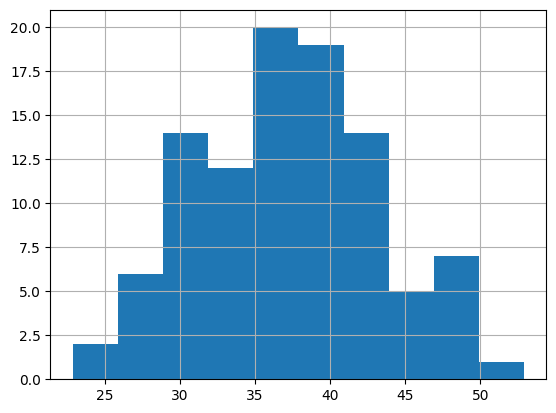

In [37]:
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

In [38]:
np.mean(sample_means)

37.248000000000005

## Poisson distribution
1. Probbilty of some number of events occuring over a fixed period of time.
2. <Lambda> - Averga number of events per time interval

### Poisson process
1. Event appear to happen certain rate, but completely random.




In [40]:
from scipy.stats import poisson

In [42]:
## pmf(cureent probabilty, average)
poisson.pmf(5,8)


0.09160366159257921

In [43]:
# 5 or less 
poisson.cdf(5,8)

0.19123606207962532

In [44]:
1 - poisson.cdf(5,8)

0.8087639379203747

## More Probabilty distribution

### Exponential distribution
1. Probabilty of time between poisson events
2. Use lambda
3. Continuos time

In [47]:
from scipy.stats import expon

In [49]:
## wait < 1 min ## scale = 1/lambda
expon.cdf(1,scale=2)

0.3934693402873666

In [50]:
## wait > 4min
1 - expon.cdf(4,scale=2)

0.1353352832366127

In [51]:
## 1 min < wait < 4min
expon.cdf(4,scale=2) - expon.cdf(1,scale=2)

0.4711953764760207

### t-distribution
1. called as student distribution
2. degree of freedom -> which affect the thickness of tails.

### Log normal distribution
1. logarthim normally distributed.
2. skewed